# 1. 匯入套件

In [28]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# 2. 資料前處理

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,  # 圖片像素值正規化
    rotation_range=40,  # 隨機旋轉圖片
    width_shift_range=0.2,  # 隨機水平偏移
    height_shift_range=0.2,  # 隨機垂直偏移
    shear_range=0.2,  # 剪切變換
    zoom_range=0.2,  # 隨機縮放
    horizontal_flip=True,  # 隨機水平翻轉
    fill_mode='nearest'  # 填充空白區域
)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'dataset/train',  # 訓練數據路徑
    target_size=(224, 224),  # 調整圖片大小
    batch_size=32,  # 每次訓練的圖片數
    class_mode='categorical'  # 類別模式（多類別分類）
)

validation_generator = test_datagen.flow_from_directory(
    'dataset/validation',  # 驗證數據路徑
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 165 images belonging to 4 classes.
Found 63 images belonging to 4 classes.


# 3. 訓練模型

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')  # 輸出層
])

In [35]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)

Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 824ms/step - accuracy: 0.2852 - loss: 1.6866 - val_accuracy: 0.2500 - val_loss: 1.3391
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.2812 - loss: 1.3373 - val_accuracy: 0.3226 - val_loss: 1.2526
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 982ms/step - accuracy: 0.3070 - loss: 1.3251
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.3125 - loss: 1.2966 - val_accuracy: 0.3750 - val_loss: 1.1535
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3200 - loss: 1.2559 - val_accuracy: 0.3548 - val_loss: 1.2784
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.2241  
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3965 - loss: 1.1407 - val_accuracy: 0.5312 - val_loss: 0.9353
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.4062 - loss: 1.0419 - val_accuracy: 0.7097 - val_loss: 0.8751
Epoch 9/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 868ms/step - accuracy: 0.3202 - loss: 1.1750
E

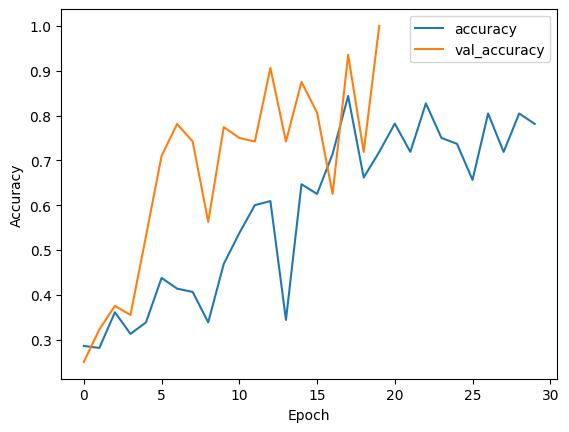

In [37]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 4. 儲存模型

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model

old_model = load_model('RecyclingModel.h5')

old_model_accuracy = old_model.evaluate(validation_generator)[1]  # 取得舊模型的驗證準確率
new_model_accuracy = history.history['val_accuracy'][-1]  # 取得新模型的最後一輪驗證準確率

print(f"Old model accuracy: {old_model_accuracy}")
print(f"New model accuracy: {new_model_accuracy}")

# if new_model_accuracy > old_model_accuracy:
#     print("保存新模型")
#     model.save('RecyclingModel.h5')  # 保存新模型
# else:
#     print("保存舊模型")
#     old_model.save('RecyclingModel.h5')  # 保存舊模型

model.save('RecyclingModel.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 214ms/step - accuracy: 0.3262 - loss: 1.3651


Old model accuracy: 0.3174603283405304
New model accuracy: 1.0
